# 第111讲 How many Samplings?

## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio¶

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

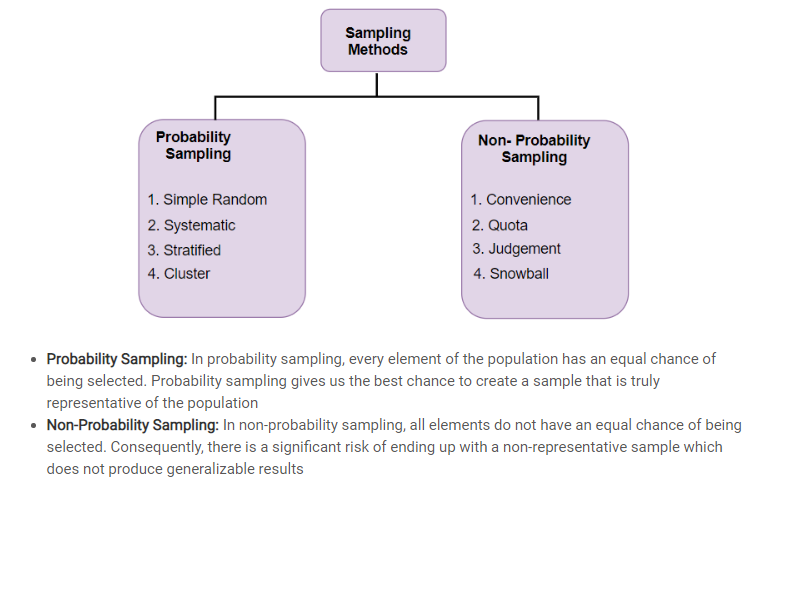

In [68]:
from IPython.display import Image
Image(filename='D:\python\Project0-Python-MachineLearning\Lesson111-1.png')

In [124]:
# Import required libraries
import numpy as np
import pandas as pd
import random

# Set random seed
np.random.seed(42)

# Define total number of products
number_of_products = 20

# Create data dictionary
data = {'id':np.arange(1, number_of_products+1).tolist(),
       'value':np.random.randint(10, 100, size=number_of_products)}

# Transform dictionary into a data frame
df = pd.DataFrame(data)

# Store the real mean in a separate variable
real_mean = df['value'].mean()
print('real_mean:', real_mean)

# View data frame
df

real_mean: 56.75


,id,value
0,1,61
1,2,24
2,3,81
3,4,70
4,5,30
5,6,92
6,7,96
7,8,84
8,9,84
9,10,97


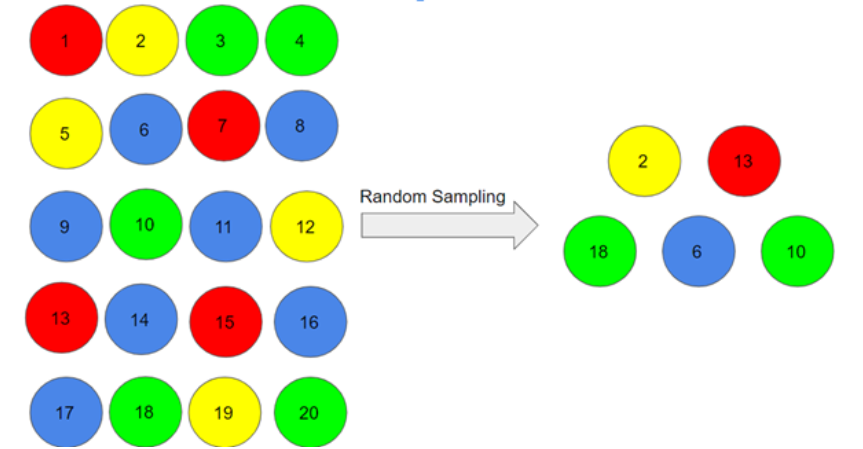

In [105]:
from IPython.display import Image
Image(filename='D:\python\Project0-Python-MachineLearning\Lesson111-2.png')

In [126]:
# Obtain simple random sample
simple_random_sample = df.sample(n=5).sort_values(by='id')

# Save the sample mean in a separate variable
simple_random_mean = simple_random_sample['value'].mean()
print('simple_random_mean:', simple_random_mean)

# View sampled data frame
simple_random_sample

simple_random_mean: 70.2


,id,value
0,1,61
2,3,81
5,6,92
7,8,84
10,11,33


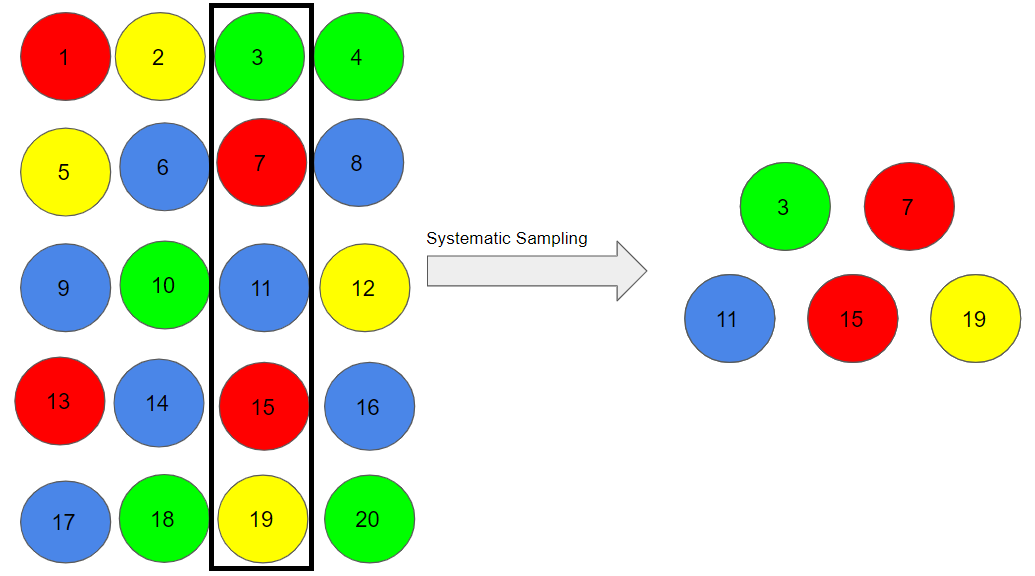

In [72]:
from IPython.display import Image
Image(filename='D:\python\Project0-Python-MachineLearning\Lesson111-3.png')

In [129]:
# Define systematic sampling function
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 5)

# Save the sample mean in a separate variable
systematic_mean = systematic_sample['value'].mean()
print('systematic_mean:', systematic_mean)

# View sampled data frame
systematic_sample

systematic_mean: 70.75


,id,value
0,1,61
5,6,92
10,11,33
15,16,97


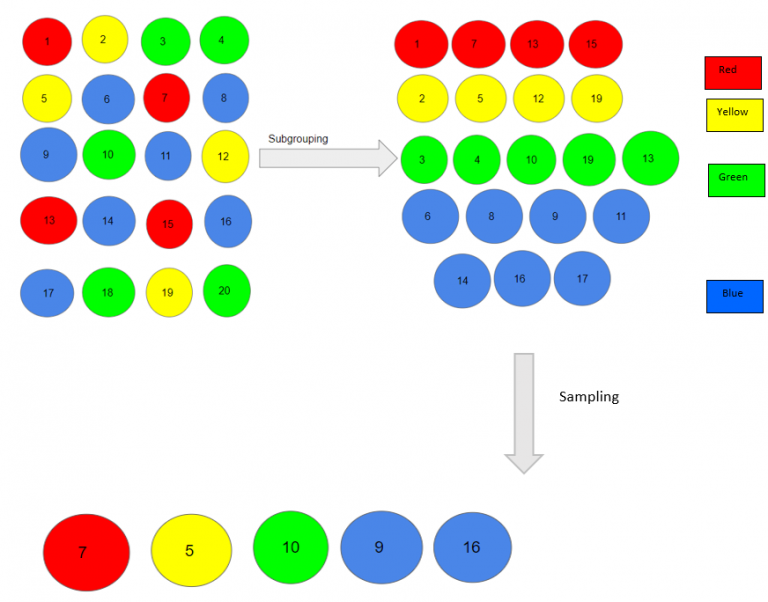

In [74]:
from IPython.display import Image
Image(filename='D:\python\Project0-Python-MachineLearning\Lesson111-4.png')

In [130]:
# Create data dictionary
dataS = {'id':np.arange(1, number_of_products+1).tolist(),
       'value':np.random.randint(10, 50, size=number_of_products),
        'strata':np.repeat([1,2,3,4], number_of_products/4).tolist()}

# Transform dictionary into a data frame
dfS = pd.DataFrame(dataS)

# View data frame
dfS

,id,value,strata
0,1,44,1
1,2,23,1
2,3,26,1
3,4,45,1
4,5,49,1
5,6,13,2
6,7,11,2
7,8,15,2
8,9,13,2
9,10,38,2


In [134]:
# Import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=9)

# Perform data frame split
for x, y in split.split(dfS, dfS['strata']):
    stratified_random_sample = dfS.iloc[y].sort_values(by='id')

# Obtain the sample mean for each group
stm=stratified_random_sample.groupby('strata').mean().drop(['id'],axis=1)
print('stratified_random_sample:', stm)

# View sampled data frame
stratified_random_sample

stratified_random_sample:         value
strata       
1        46.0
2        26.5
3        35.0
4        23.5


,id,value,strata
0,1,44,1
3,4,45,1
4,5,49,1
7,8,15,2
9,10,38,2
10,11,27,3
12,13,43,3
15,16,23,4
17,18,24,4


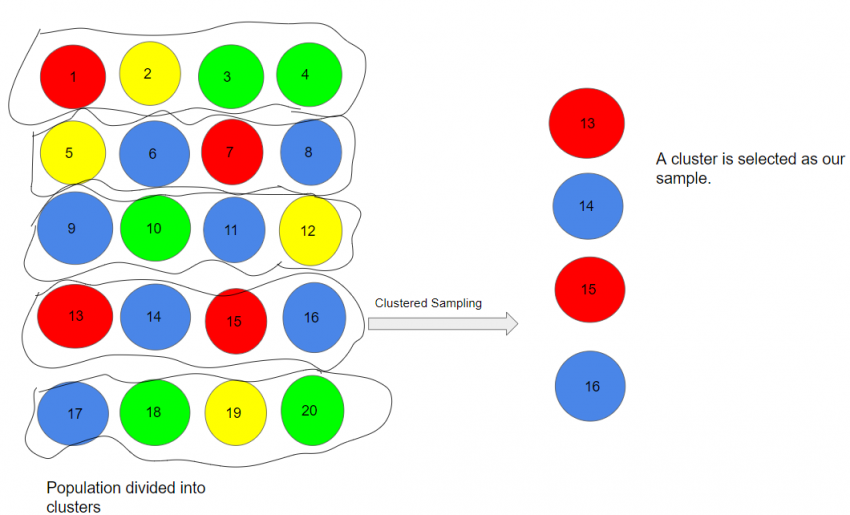

In [102]:
from IPython.display import Image
Image(filename='D:\python\Project0-Python-MachineLearning\Lesson111-5.png')

In [139]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%5 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")
        
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(dfS,5)

# Save the sample mean in a separate variable
cluster_mean = cluster_sample['value'].mean()
print('cluster_mean:', cluster_mean)

# View sampled data frame
cluster_sample

cluster_mean: 26.0


,id,value,strata,cluster_id
16,17,40,4,5
17,18,24,4,5
18,19,17,4,5
19,20,23,4,5
